<a href="https://colab.research.google.com/github/Griffinw15/DS-Unit-1-Sprint-2-Statistics/blob/master/module3/LS_DS_123_Introduction_to_Bayesian_Inference_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lambda School Data Science Module 123

## Introduction to Bayesian Inference




## Assignment - Code it up!

We used pure math to apply Bayes Theorem to drug tests. Now write Python code to reproduce the results! This is purposefully open ended - you'll have to think about how you should represent probabilities and events. You can and should look things up.

Specific goals/targets:

### 1) Write a function 

`def prob_drunk_given_positive(prob_drunk_prior, false_positive_rate):` 

You should only truly need these two values in order to apply Bayes Theorem. In this example, imagine that individuals are taking a breathalyzer test with an 8% false positive rate, a 100% true positive rate, and that our prior belief about drunk driving in the population is 1/1000. 
 - What is the probability that a person is drunk after one positive breathalyzer test?
 - What is the probability that a person is drunk after two positive breathalyzer tests?
 - How many positive breathalyzer tests are needed in order to have a probability that's greater than 95% that a person is drunk beyond the legal limit?

### 2) Explore `scipy.stats.bayes_mvs`  
Read its documentation, and experiment with it on data you've tested in other ways earlier this week.
 - Create a visualization comparing the results of a Bayesian approach to a traditional/frequentist approach. (with a large sample size they should look close to identical, however, take this opportunity to practice visualizing condfidence intervals in general. The following are some potential ways that you could visualize confidence intervals on your graph:
  - [Matplotlib Error Bars](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.errorbar.html)
  - [Seaborn barplot with error bars](https://seaborn.pydata.org/generated/seaborn.barplot.html)
  - [Vertical ines to show bounds of confidence interval](https://www.simplypsychology.org/confidence-interval.jpg)
  - [Confidence Intervals on Box Plots](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.axes.Axes.boxplot.html)

### 3) In your own words, summarize the difference between Bayesian and Frequentist statistics

If you're unsure where to start, check out [this blog post of Bayes theorem with Python](https://dataconomy.com/2015/02/introduction-to-bayes-theorem-with-python/).



In [0]:
# True Positive Rate: 100%
p_pos_user = 1
# Prior Probability
p_user = .001
# False Positive Rate: 8%
p_pos_non_user = .08
# Complement of our prior
p_non_user = 1 - p_user

def prob_drunk_given_positive(p_user, p_pos_non_user, p_pos_user):
  numerator = p_pos_user*p_user
  denominator = (p_pos_user)*(p_user) + (p_pos_non_user)*(p_non_user)

  posterior1 = numerator / denominator

  return posterior1

In [0]:
posterior1_answer = prob_drunk_given_positive(p_user, p_pos_non_user, p_pos_user)

In [4]:
print("Probability that a person is drunk after one breathalyzer test:", posterior1_answer)

Probability that a person is drunk after one breathalyzer test: 0.012357884330202669


In [0]:
# True Positive Rate: 100%
p_pos_user = 1
# NEW Prior Probability is posterior1
posterior1_answer = 0.012357884330202669
# False Positive Rate: 8%
p_pos_non_user = .08
# Complement of our prior
p_non_user = 1 - p_user

def prob_drunk_given_failed_breath(posterior1_answer, p_pos_non_user, p_pos_user):
  numerator = p_pos_user*posterior1_answer
  denominator = (p_pos_user)*(posterior1_answer) + (p_pos_non_user)*(p_non_user)

  posterior2 = numerator / denominator

  return posterior2

In [0]:
posterior2_answer = prob_drunk_given_failed_breath(posterior1_answer, p_pos_non_user, p_pos_user)

In [7]:
print("Probability that a person is drunk after two breathalyzer tests:", posterior2_answer)

Probability that a person is drunk after two breathalyzer tests: 0.13392032576279944


In [8]:
prior = 1/1000
prob_drunk_posterior = []
for i in range(0,10):
  prior = prob_drunk_given_positive(prior,.08,1)
  prob_drunk_posterior.append(prior)

prob_drunk_posterior

[0.012357884330202669,
 0.13392032576279944,
 0.6262631956114275,
 0.8868282331034462,
 0.9173311134550083,
 0.9198597034170114,
 0.9200623900176687,
 0.9200785925854276,
 0.9200798875192691,
 0.920079991010539]

In [9]:
import pandas as pd
import numpy as np
from scipy import stats

df = pd.read_csv('https://raw.githubusercontent.com/ryanleeallred/datasets/master/adult.csv', na_values=" ?")
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [10]:
df.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [0]:
sample = df['age'].sample(500)

In [0]:
#compare Bayesian approach to a traditional/frequentist approach
def confidence_interval(sample, confidence=0.95):

  sample = np.array(sample)
 
  mean = np.mean(sample)
  
  n = len(sample)
  
  stderr = np.std(sample, ddof=1) / np.sqrt(n)
  
  t = stats.t.ppf((1 + confidence) / 2.0, n - 1)
 
  margin_of_error = t * stderr
  return mean - margin_of_error, mean, mean + margin_of_error

In [13]:
confidence_interval(sample)

(37.219090523785454, 38.4, 39.58090947621454)

In [14]:
CI, _, _ = stats.bayes_mvs(sample, alpha=.95)

CI

Mean(statistic=38.4, minmax=(37.219090523785454, 39.58090947621454))

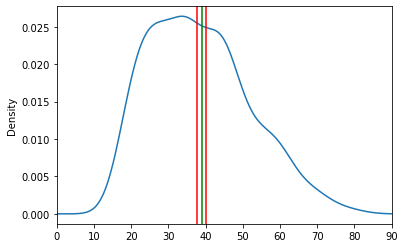

In [15]:
import matplotlib.pyplot as plt

sample.plot.density()
plt.axvline(39.012, color='green')
plt.axvline(37.76810225155542, color='red')
plt.axvline(40.25589774844458, color='red')
plt.xlim((0, 90))  
plt.show()

In [0]:
#Bayesian vs. Frequentist Statistics in my own words:

#Bayesian statistician will have an initial(gut) hypothesis
#He will then adjust given new information

#Frequentist statistician will start with random sample
#Given new info, new tests can be ran to become increasingly more accurate


## Resources

- [Worked example of Bayes rule calculation](https://en.wikipedia.org/wiki/Bayes'_theorem#Examples) (helpful as it fully breaks out the denominator)
- [Source code for mvsdist in scipy](https://github.com/scipy/scipy/blob/90534919e139d2a81c24bf08341734ff41a3db12/scipy/stats/morestats.py#L139)

## Stretch Goals:

- Go back and study the content from Modules 1 & 2 to make sure that you're really comfortable with them.
- Apply a Bayesian technique to a problem you previously worked (in an assignment or project work) on from a frequentist (standard) perspective
- Check out [PyMC3](https://docs.pymc.io/) (note this goes beyond hypothesis tests into modeling) - read the guides and work through some examples
- Take PyMC3 further - see if you can build something with it!